# Classification of Pulsar Candidates Using a Multilayer Perceptron (MLP) Neural Network

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

## Step 1: Load the dataset

In [2]:
file_path = "data_pulsars.csv"

try:
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully. Here is a preview:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
except pd.errors.EmptyDataError:
    print(f"Error: The file '{file_path}' is empty.")
except pd.errors.ParserError:
    print(f"Error: The file '{file_path}' could not be parsed. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Dataset loaded successfully. Here is a preview:
    Mean of the integrated profile  \
0                       140.562500   
1                       102.507812   
2                       103.015625   
3                       136.750000   
4                        88.726562   

    Standard deviation of the integrated profile  \
0                                      55.683782   
1                                      58.882430   
2                                      39.341649   
3                                      57.178449   
4                                      40.672225   

    Excess kurtosis of the integrated profile  \
0                                   -0.234571   
1                                    0.465318   
2                                    0.323328   
3                                   -0.068415   
4                                    0.600866   

    Skewness of the integrated profile   Mean of the DM-SNR curve  \
0                            -0.699648        

In [3]:
# Check for duplicate rows and remove them if necessary
if df.duplicated().any():
    print("Duplicate rows found. Removing duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")

## Step 2: Exploratory Analysis

In [4]:
# Function to perform exploratory analysis
def exploratory_analysis(dataframe):
    print("\nDataset information:")
    print(dataframe.info())

    print("\nStatistical summary of the dataset:")
    print(dataframe.describe())

    print("\nChecking for missing values in the dataset:")
    print(dataframe.isnull().sum())

# Call the function to perform exploratory analysis
exploratory_analysis(df)


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memor

## Step 3: Clean the column names

In [5]:
# Remove spaces in column names and replace them with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Display the new column names
print("\nColumn names after cleaning:")
print(df.columns)


Column names after cleaning:
Index(['Mean_of_the_integrated_profile',
       'Standard_deviation_of_the_integrated_profile',
       'Excess_kurtosis_of_the_integrated_profile',
       'Skewness_of_the_integrated_profile', 'Mean_of_the_DM-SNR_curve',
       'Standard_deviation_of_the_DM-SNR_curve',
       'Excess_kurtosis_of_the_DM-SNR_curve', 'Skewness_of_the_DM-SNR_curve',
       'target_class'],
      dtype='object')


In [6]:
# Additional analysis: Check the distribution of the target class
print("\nClass distribution in the target variable:")
print(df["target_class"].value_counts().to_frame())


Class distribution in the target variable:
              count
target_class       
0             16259
1              1639


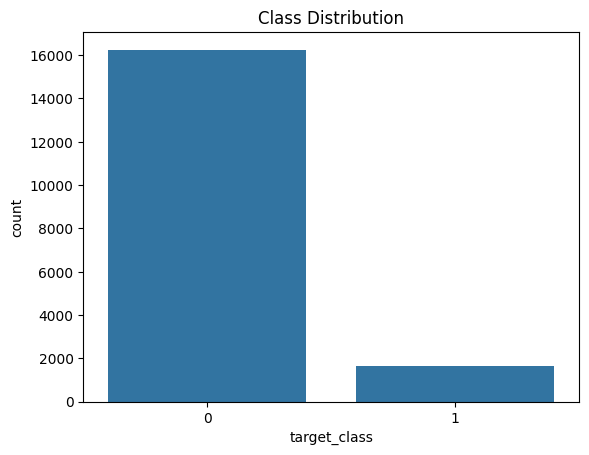

In [7]:
# Visualize the class distribution
sns.countplot(x='target_class', data=df)
plt.title('Class Distribution')
plt.show()

## Step 4: Separate features and target

In [8]:
X = df.drop(columns=['target_class'])
y = df['target_class']

## Step 5: Standardize the features

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 6: Create a DataFrame with the scaled data

In [10]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [11]:
print("\nFeature scaling completed. Here is a preview of the scaled features:")
print(X_scaled_df.head())


Feature scaling completed. Here is a preview of the scaled features:
   Mean_of_the_integrated_profile  \
0                        1.149317   
1                       -0.334168   
2                       -0.314372   
3                        1.000694   
4                       -0.871402   

   Standard_deviation_of_the_integrated_profile  \
0                                      1.334832   
1                                      1.802265   
2                                     -1.053322   
3                                      1.553254   
4                                     -0.858879   

   Excess_kurtosis_of_the_integrated_profile  \
0                                  -0.669570   
1                                  -0.011785   
2                                  -0.145233   
3                                  -0.513409   
4                                   0.115609   

   Skewness_of_the_integrated_profile  Mean_of_the_DM-SNR_curve  \
0                           -0.400459       

## Step 7: Split the dataset into training and testing sets

In [12]:
# Since the target class is imbalanced, stratify the split to maintain proportionality in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.2, stratify=y, random_state=0
)

# Displaying information about the splits
print(f"\nNumber of training samples: {X_train.shape[0]}")
print(f"Number of testing samples: {X_test.shape[0]}")
print(f"\nClass distribution in training set:\n{y_train.value_counts(normalize=True)}")
print(f"Class distribution in testing set:\n{y_test.value_counts(normalize=True)}")


Number of training samples: 14318
Number of testing samples: 3580

Class distribution in training set:
target_class
0    0.908437
1    0.091563
Name: proportion, dtype: float64
Class distribution in testing set:
target_class
0    0.90838
1    0.09162
Name: proportion, dtype: float64


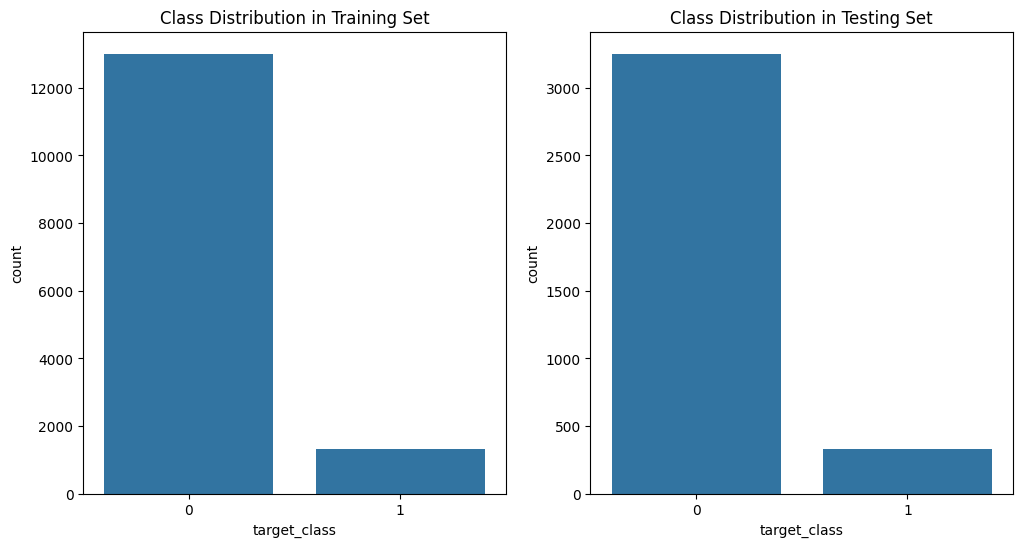

In [13]:
# Visualize class distribution in training and testing sets
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.countplot(ax=axes[0], x=y_train)
axes[0].set_title('Class Distribution in Training Set')
sns.countplot(ax=axes[1], x=y_test)
axes[1].set_title('Class Distribution in Testing Set')
plt.show()

## Step 8: Create the artificial neural network

In [14]:
# Define the sequential model
model = Sequential()

# Add the first hidden layer with ReLU activation and Dropout regularization
model.add(Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))  # Adding Dropout to reduce overfitting

# Add additional hidden layers
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(0.3))

# Add the output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model with additional metrics for evaluation
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Display the summary of the model architecture
model.summary()

# Train the model with validation split and increased epochs
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

c:\Users\lufec\anaconda3\envs\mca_ann_inv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833 (3.25 KB)

 Trainable params: 833 (3.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8402 - loss: 0.3873 - precision: 0.3953 - recall: 0.5887 - val_accuracy: 0.9759 - val_loss: 0.0813 - val_precision: 0.9609 - val_recall: 0.7865
Epoch 2/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9719 - loss: 0.1001 - precision: 0.9250 - recall: 0.7555 - val_accuracy: 0.9770 - val_loss: 0.0789 - val_precision: 0.9424 - val_recall: 0.8149
Epoch 3/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9785 - loss: 0.0887 - precision: 0.9386 - recall: 0.8127 - val_accuracy: 0.9784 - val_loss: 0.0760 - val_precision: 0.9469 - val_recall: 0.8256
Epoch 4/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9779 - loss: 0.0848 - precision: 0.9217 - recall: 0.8245 - val_accuracy: 0.9780 - val_loss: 0.0742 - val_precision: 0.9395 - val_recall: 0.8292
Epoch 5/100
358/358 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9751 - loss: 0.0973 - precision: 0.8988 - recall: 0.8078 - val_accuracy: 0.9787 - val_los

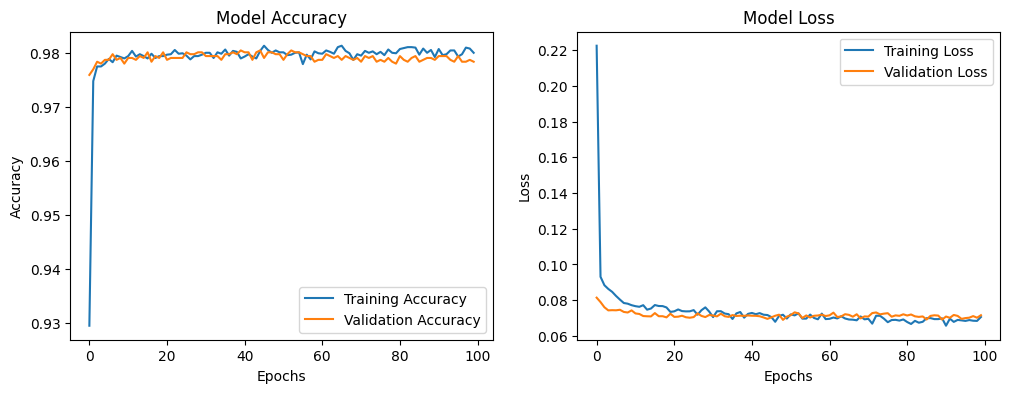

In [15]:
# Plotting the training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [16]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_precision, test_recall = model.evaluate(X_test, y_test)

# Print the evaluation metrics for the test set
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Precision: {test_precision:.2f}")
print(f"Test Recall: {test_recall:.2f}")

# Calculate and print the F1 Score based on precision and recall
f1_score = 2 * (test_precision * test_recall) / (test_precision + test_recall + 1e-7)
print(f"F1 Score: {f1_score:.2f}")

112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9781 - loss: 0.0758 - precision: 0.9524 - recall: 0.8078
Test Accuracy: 97.91%
Test Precision: 0.93
Test Recall: 0.83
F1 Score: 0.88


112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


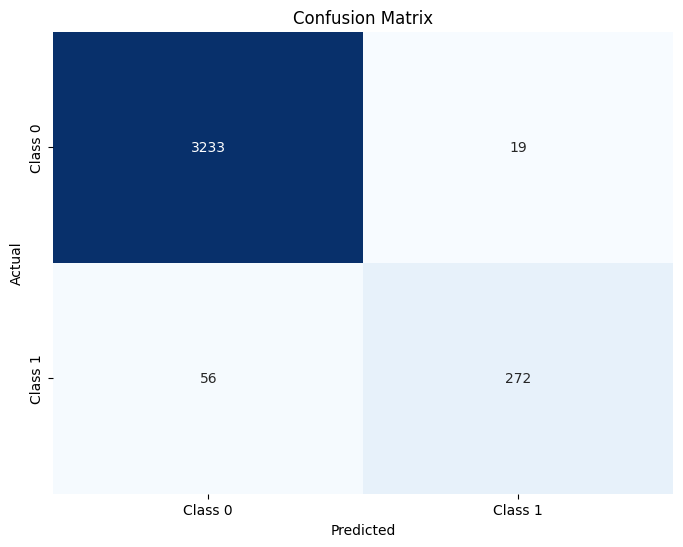

In [17]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary class predictions
y_pred_class = (y_pred > 0.5).astype("int32")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [18]:
# Calculate and print precision and recall from the confusion matrix for verification
print(f"Precision (Class 1): {precision_score(y_test, y_pred_class):.2f}")
print(f"Recall (Class 1): {recall_score(y_test, y_pred_class):.2f}")

Precision (Class 1): 0.93
Recall (Class 1): 0.83
